In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# homedir = "/home/annzhou"
homedir = "/u/az6922"
dirprefix = f"{homedir}/DRing/src/emp/datacentre"
fseedarr = range(1,6)
itemnamearr = ["leafspine","dring"]
# percentilearr = list(range(10,91,10))+[99]
percentilearr = list(range(10,91,10))
pickledatadict = dict()
pickledatadict["prv1,leafspine,2"] = "prv1_data.pickle" 
pickledatadict["prv1,leafspine,10"] = "prv1_data.pickle" 
pickledatadict["prv1,dring,2"] = "prv1_data2.pickle" 
pickledatadict["prv1,dring,10"] = "prv1_data2.pickle" 
pickledatadict["cluster_a,leafspine,10"] = "cluster_a_data.pickle" 
pickledatadict["cluster_a,leafspine,60"] = "cluster_a_data2.pickle" 
pickledatadict["cluster_a,dring,10"] = "cluster_a_data.pickle" 
pickledatadict["cluster_a,dring,60"] = "cluster_a_data2.pickle"

/tmp/ipykernel_2952858/2973423078.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[iload].set_xticklabels([int(x) for x in axs[iload].get_xticks()], fontsize=16)
/tmp/ipykernel_2952858/2973423078.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[iload].set_yticklabels([f"{x:.2f}" for x in axs[iload].get_yticks()], fontsize=16)


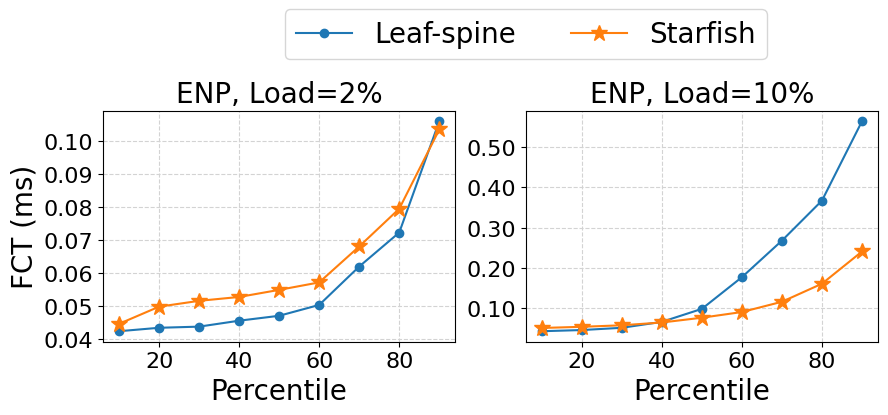

In [23]:
# run on ocean
import pickle

trafficname = "prv1"
loadarr = [2,10]
title = "ENP"

markerlist=['.','*']
labellist=["Leaf-spine","Starfish"]

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

fig,axs = plt.subplots(1,2,figsize=(5*2,3*1))

for iload,load in enumerate(loadarr):
    for iitemname,itemname in enumerate(itemnamearr):

        picklename = pickledatadict[f"{trafficname},{itemname},{load}"]
        with open(f'{homedir}/DRing/src/emp/datacentre/experiments/routing/{picklename}', 'rb') as handle:
            datadict = pickle.load(handle)

        fctlist = [list() for _ in range(len(percentilearr))]
        for fseed in fseedarr:
            logfile = f"m_{itemname}_{trafficname}_{load}_{fseed}.log"
            durationlist = datadict[logfile][0]
            durationlist.sort()
            durationlistlen = len(durationlist)

            for ipercentile,percentile in enumerate(percentilearr):
                fctlist[ipercentile].append(durationlist[int(durationlistlen*(percentile/100.0))])

        axs[iload].plot(percentilearr,[sum(mylist)/len(mylist) for mylist in fctlist],label=labellist[iitemname],marker=markerlist[iitemname],markersize=12)
        if iload==0:
            axs[iload].set_ylabel('FCT (ms)', fontsize=20)
        axs[iload].set_xlabel('Percentile', fontsize=20)
        axs[iload].set_title(f"{title}, Load={load}%", fontsize=20)
        # axs[iload].set_ylim(0,ylimlist[itrafficname])
        # axs[iload].set_xlim(0,xlimlist[itrafficname])
        axs[iload].set_xticklabels([int(x) for x in axs[iload].get_xticks()], fontsize=16)
        axs[iload].set_yticklabels([f"{x:.2f}" for x in axs[iload].get_yticks()], fontsize=16)
        axs[iload].grid(color='lightgrey', linestyle='dashed', axis="both")

handles, labels = axs[0].get_legend_handles_labels()
plt.legend(handles, labels, loc='upper center', ncol=2, bbox_to_anchor=(0, 1.5), fontsize=20)
# plt.tight_layout()
plt.savefig(f"{homedir}/DRing/src/emp/datacentre/nsdi25_plotting/fig_percentile_{trafficname}.pdf", dpi=600, bbox_inches='tight')
plt.show()

/tmp/ipykernel_2358447/2948300363.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[iload].set_xticklabels([int(x) for x in axs[iload].get_xticks()], fontsize=16)
/tmp/ipykernel_2358447/2948300363.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[iload].set_yticklabels([f"{x:.2f}" for x in axs[iload].get_yticks()], fontsize=16)


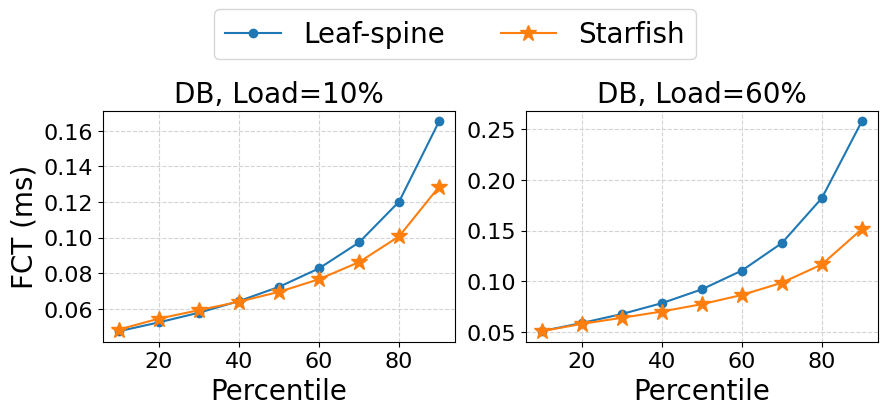

In [5]:
# run on meaty01
import pickle

trafficname = "cluster_a"
loadarr = [10,60]
title = "DB"

markerlist=['.','*']
labellist=["Leaf-spine","Starfish"]

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

fig,axs = plt.subplots(1,2,figsize=(5*2,3*1))

for iload,load in enumerate(loadarr):
    for iitemname,itemname in enumerate(itemnamearr):

        picklename = pickledatadict[f"{trafficname},{itemname},{load}"]
        with open(f'{homedir}/DRing/src/emp/datacentre/experiments/routing/{picklename}', 'rb') as handle:
            datadict = pickle.load(handle)

        fctlist = [list() for _ in range(len(percentilearr))]
        for fseed in fseedarr:
            logfile = f"m_{itemname}_{trafficname}_{load}_{fseed}.log"
            durationlist = datadict[logfile][0]
            durationlist.sort()
            durationlistlen = len(durationlist)

            for ipercentile,percentile in enumerate(percentilearr):
                fctlist[ipercentile].append(durationlist[int(durationlistlen*(percentile/100.0))])

        axs[iload].plot(percentilearr,[sum(mylist)/len(mylist) for mylist in fctlist],label=labellist[iitemname],marker=markerlist[iitemname],markersize=12)
        if iload==0:
            axs[iload].set_ylabel('FCT (ms)', fontsize=20)
        axs[iload].set_xlabel('Percentile', fontsize=20)
        axs[iload].set_title(f"{title}, Load={load}%", fontsize=20)
        # axs[iload].set_ylim(0,ylimlist[itrafficname])
        # axs[iload].set_xlim(0,xlimlist[itrafficname])
        axs[iload].set_xticklabels([int(x) for x in axs[iload].get_xticks()], fontsize=16)
        axs[iload].set_yticklabels([f"{x:.2f}" for x in axs[iload].get_yticks()], fontsize=16)
        axs[iload].grid(color='lightgrey', linestyle='dashed', axis="both")

handles, labels = axs[0].get_legend_handles_labels()
plt.legend(handles, labels, loc='upper center', ncol=2, bbox_to_anchor=(-0.2, 1.5), fontsize=20)
# plt.tight_layout()
plt.savefig(f"{homedir}/DRing/src/emp/datacentre/nsdi25_plotting/fig_percentile_{trafficname}.pdf", dpi=600, bbox_inches='tight')
plt.show()